In [1]:
from drrdTools import *
#import drrdTools as dr
import numpy as np

In [2]:
# Information for the raw data file name. Tipically the file
# names are PPPNNN.SSS, where PPP are three digits for the
# prefix (ex. AB1) reflecting the experiment; NNN are the 
# three digits for the animal ID, (064 if animal is 64); and 
# SSS are the three digits for the session (001 for session 1). 
# Example of a filename: AB1064.001
prefix= 'AB1'
animalID= 65
session = 2

# modify the line reflect to your data path
dataPathAB = '/home/mbreyes/ufabc/dados/AB/data/raw/AB1/'
dataPathAH = '/home/mbreyes/Dropbox/ReyesTesti/drrd/dadosBrutos/AH/'

________________________________________________________________________________
844  trials found
[0.    1.2   1.206 1.212]
Trying to fix inconsistencies in prime times
Successfully fixed
[1.2]
Rat64  Trials:844  Reinforced:237  Non-Reinforced:607  Invalid:0



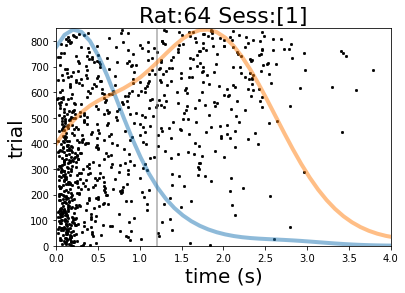

In [3]:
# Extract the data from a file and plot the response during the session
D = drrd(prefix= 'AB1', animalID= 64, sessions = 1, dataPath = dataPathAB)

________________________________________________________________________________
459  trials found
[0.  1.2]
Rat65  Trials:459  Reinforced:286  Non-Reinforced:173  Invalid:0



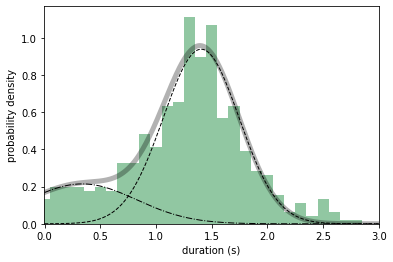

In [4]:
# Example of how to fit a double gaussian
pars = fit_single_animal(animalID,session,plotFlag=True,indexes=(None,None),ax=None, prefix='AB1', dataPath= dataPathAB)

________________________________________________________________________________
700  trials found
[0.    0.01  0.5   0.6   0.7   0.8   0.9   1.    1.012 1.1   1.2  ]
Trying to fix inconsistencies in prime times
Successfully fixed
[0.8]
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  558 700
Rat14  Trials:700  Reinforced:308  Non-Reinforced:392  Invalid:0



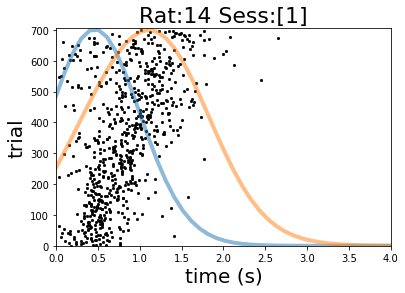

In [37]:
D = dr.drrd('AB1',animalID= 14, sessions= [1], dataPath= dataPathAB, events_to_eliminate= [5,9])

In [38]:
# cuts the original data and returns the data from the startEvent on 
def eliminate_beginning(M, startEvent = None):

    # tests if there is an startEvent
    if startEvent != None:

        # checking when was the last time the event occurred (item of the list)
        last_occurrence = [M[k] for k in range(len(M)) if M[k][1] == startEvent][-1]

        # finds the corresponding index
        cuttoff_index = M.index(last_occurrence)
        print(cuttoff_index)

        # overrides the vector discarding events before the startEvent
        M = M[cuttoff_index:]

    # returns the updated variable (the same as parsed if startEvent == None)
    return(M)

[[17.448, 1], [18.496, 3], [19.498, 1], [20.79, 3], [24.048, 5], [24.386, 9], [24.444, 5], [26.808, 9], [26.826, 5], [26.9, 9], [29.276, 1], [30.0, 11], [32.002, 18], [32.302, 3], [32.314, 16], [32.414, 26], [32.48, 1], [32.968, 3], [33.242, 5], [34.12, 9], [34.142, 5], [34.158, 9], [34.658, 5], [35.724, 9], [57.37, 1], [58.972, 3], [59.644, 5]] 


11


 [[30.0, 11], [32.002, 18], [32.302, 3], [32.314, 16], [32.414, 26], [32.48, 1], [32.968, 3], [33.242, 5], [34.12, 9], [34.142, 5], [34.158, 9], [34.658, 5], [35.724, 9], [57.37, 1], [58.972, 3], [59.644, 5], [59.662, 9], [59.668, 5], [61.802, 9], [62.936, 1], [64.936, 18], [65.5, 3], [65.512, 16], [65.612, 26], [65.86, 5], [67.466, 9], [74.154, 5]]
________________________________________________________________________________
670  trials found
[0. 2.]
Rat79  Trials:670  Reinforced:190  Non-Reinforced:480  Invalid:0



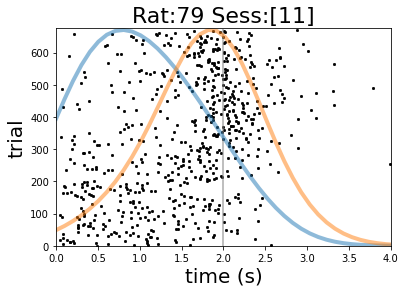

In [40]:
fileName = 'AH0079.011'


complete_filename = dataPathAH + fileName

data = med2tec(complete_filename, flag='A')
print(data[:27],'\n\n')
data = eliminate_beginning(data, startEvent = 11)
print('\n\n',data[:27])
D = dr.drrd('AH0',animalID= 79, sessions= [11], dataPath= dataPathAH, events_to_eliminate= [5,9])

________________________________________________________________________________
199  trials found
[0. 2.]
Rat80  Trials:199  Reinforced:112  Non-Reinforced:87  Invalid:0

Number of trials to split too large, trials split in half


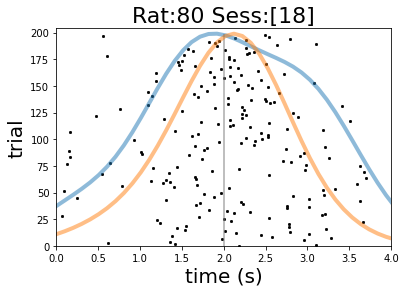

In [34]:
D = dr.drrd('AH0',animalID= 80, sessions= [18], dataPath= dataPathAH, events_to_eliminate= [5,9])

In [14]:
data_first_start = [data[k] for k in range(len(data)) if data[k][1] == 1][0]
index_first_start = data.index(data_first_start)

In [15]:
data[0][1]

11

In [16]:
[data[k] for k in range(len(data)) if not (data[k][1] == 3 and k <= index_first_start)]

[[30.0, 11],
 [32.002, 18],
 [32.314, 16],
 [32.414, 26],
 [32.48, 1],
 [32.968, 3],
 [33.242, 5],
 [34.12, 9],
 [34.142, 5],
 [34.158, 9],
 [34.658, 5],
 [35.724, 9],
 [57.37, 1],
 [58.972, 3],
 [59.644, 5],
 [59.662, 9],
 [59.668, 5],
 [61.802, 9],
 [62.936, 1],
 [64.936, 18],
 [65.5, 3],
 [65.512, 16],
 [65.612, 26],
 [65.86, 5],
 [67.466, 9],
 [74.154, 5],
 [74.884, 9],
 [75.632, 5],
 [75.896, 9],
 [75.914, 5],
 [76.024, 9],
 [76.654, 1],
 [77.586, 3],
 [80.388, 1],
 [81.482, 3],
 [83.446, 1],
 [83.528, 3],
 [83.666, 1],
 [84.292, 3],
 [87.286, 5],
 [88.126, 9],
 [88.808, 1],
 [90.028, 3],
 [90.538, 1],
 [90.756, 3],
 [93.03, 5],
 [93.256, 9],
 [94.1, 1],
 [95.188, 3],
 [97.024, 5],
 [98.33, 9],
 [99.788, 1],
 [100.264, 3],
 [105.058, 1],
 [105.226, 3],
 [107.424, 1],
 [107.592, 3],
 [107.67, 1],
 [109.1, 3],
 [110.168, 5],
 [110.554, 9],
 [111.384, 1],
 [111.588, 3],
 [111.646, 1],
 [112.47, 3],
 [113.868, 5],
 [114.4, 9],
 [114.624, 5],
 [115.042, 9],
 [115.556, 1],
 [116.644, 3]

In [17]:
data = np.array(data)                # transforms data to numpy array

# identifying in which index the first trial begins.
index_first_start = np.where(data[:,1]==1)[0][0]
index_first_end   = np.where(data[:,1]==3)[0][0]
print(index_first_start,index_first_end)

5 2


In [18]:
data[data[:,1] == 3 ,:][:index_first_start]

array([[32.302,  3.   ],
       [32.968,  3.   ],
       [58.972,  3.   ],
       [65.5  ,  3.   ],
       [77.586,  3.   ]])

In [19]:
# data = eliminate_events(data, events_to_eliminate = events_to_eliminate)
data = np.array(data)                # transforms data to numpy array


startIndex    = np.array([i for i in range(len(data)) if data[i, 1] ==  1])  # code that indicates that the lever was pressed
endIndex      = np.array([i for i in range(len(data)) if data[i, 1] ==  3])  # instant when the lever was released
primeIndex    = np.array([i for i in range(len(data)) if data[i, 1] == 18])  # moment when the trial reached the criterion
lightOnIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 11])  # when light was turned on (beginning of session)
lightOffIndex = np.array([i for i in range(len(data)) if data[i, 1] == 21])  # when light was turned off (end of session)
    
phaseAdvIndex = np.array([i for i in range(len(data)) if data[i, 1] == 17])  # moment of phase advance (criterion increased)
phaseBckIndex = np.array([i for i in range(len(data)) if data[i, 1] == 27])  # moment of phase retreat (criterion decreased)


In [20]:
# small correction for a bug in the med-pc file ---
data = dr.fix_clock_reset(data)
data[:15,:]

array([[30.   , 11.   ],
       [32.002, 18.   ],
       [32.302,  3.   ],
       [32.314, 16.   ],
       [32.414, 26.   ],
       [32.48 ,  1.   ],
       [32.968,  3.   ],
       [33.242,  5.   ],
       [34.12 ,  9.   ],
       [34.142,  5.   ],
       [34.158,  9.   ],
       [34.658,  5.   ],
       [35.724,  9.   ],
       [57.37 ,  1.   ],
       [58.972,  3.   ]])

In [21]:

data

array([[  30.   ,   11.   ],
       [  32.002,   18.   ],
       [  32.302,    3.   ],
       ...,
       [2868.298,    9.   ],
       [2993.52 ,    5.   ],
       [2993.842,    9.   ]])

In [22]:
lightOnIndex

array([0])

In [23]:
startIndex

array([   5,   13,   19,   32,   34,   36,   38,   42,   44,   48,   52,
         54,   56,   58,   62,   64,   70,   76,   78,   82,   86,   90,
         96,  103,  109,  111,  113,  115,  119,  125,  127,  131,  133,
        137,  141,  143,  145,  147,  149,  153,  164,  168,  172,  174,
        176,  180,  187,  205,  215,  221,  228,  241,  243,  245,  249,
        251,  253,  261,  263,  265,  267,  269,  271,  277,  281,  283,
        289,  293,  295,  301,  305,  307,  311,  313,  319,  323,  330,
        334,  338,  349,  353,  355,  363,  365,  369,  371,  375,  382,
        386,  392,  394,  400,  404,  406,  414,  416,  418,  422,  424,
        428,  435,  439,  441,  447,  451,  457,  461,  463,  467,  473,
        475,  481,  485,  489,  497,  510,  518,  524,  526,  530,  536,
        542,  544,  548,  552,  556,  560,  569,  573,  577,  583,  585,
        589,  596,  600,  604,  610,  625,  629,  633,  635,  639,  643,
        650,  654,  656,  658,  662,  671,  675,  6

In [24]:
lightOnIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 11])  # when light was turned on (beginning of session)
lightOnIndex

array([0])

In [25]:
lightOffIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 21])  # when light was turned on (beginning of session)
lightOffIndex

array([], dtype=float64)

In [26]:
data = M

In [27]:
last_occurrence = [M[k] for k in range(len(M)) if M[k][1] == 11][-1]
cuttoff_index = M.index(last_occurrence)

A = M[cuttoff_index:]
A

[[30.0, 11],
 [31.202, 18],
 [31.954, 3],
 [31.966, 16],
 [32.066, 26],
 [35.008, 1],
 [36.208, 18],
 [36.492, 3],
 [36.504, 16],
 [36.604, 26],
 [38.266, 1],
 [39.418, 3],
 [41.866, 1],
 [43.066, 18],
 [43.512, 3],
 [43.524, 16],
 [43.624, 26],
 [45.56, 1],
 [45.816, 3],
 [45.856, 1],
 [46.814, 3],
 [51.386, 1],
 [52.316, 3],
 [52.388, 1],
 [53.18, 3],
 [55.364, 1],
 [56.564, 18],
 [57.13, 3],
 [57.142, 16],
 [57.15, 1],
 [57.242, 26],
 [57.442, 3],
 [59.588, 1],
 [60.788, 18],
 [61.712, 3],
 [61.724, 16],
 [61.824, 26],
 [65.056, 1],
 [66.256, 18],
 [66.54, 3],
 [66.552, 16],
 [66.652, 26],
 [68.968, 1],
 [69.292, 3],
 [72.38, 1],
 [73.58, 18],
 [73.954, 3],
 [73.966, 16],
 [74.066, 26],
 [77.438, 1],
 [78.638, 18],
 [78.708, 3],
 [78.72, 16],
 [78.82, 26],
 [81.096, 1],
 [82.146, 3],
 [83.994, 1],
 [84.866, 3],
 [93.634, 1],
 [94.834, 18],
 [95.024, 3],
 [95.036, 16],
 [95.136, 26],
 [97.954, 1],
 [98.898, 3],
 [101.212, 1],
 [102.33, 3],
 [103.664, 1],
 [104.864, 18],
 [105.28, 3],

In [28]:
A = [M[k] for k in range(len(M)) if M[k][1] != 9]
A

[[5.426, 1],
 [7.52, 3],
 [9.16, 2],
 [14.208, 4],
 [16.858, 1],
 [18.706, 3],
 [20.484, 1],
 [22.502, 3],
 [24.31, 1],
 [26.492, 3],
 [26.578, 1],
 [27.516, 3],
 [29.746, 1],
 [30.0, 11],
 [31.202, 18],
 [31.954, 3],
 [31.966, 16],
 [32.066, 26],
 [35.008, 1],
 [36.208, 18],
 [36.492, 3],
 [36.504, 16],
 [36.604, 26],
 [38.266, 1],
 [39.418, 3],
 [41.866, 1],
 [43.066, 18],
 [43.512, 3],
 [43.524, 16],
 [43.624, 26],
 [45.56, 1],
 [45.816, 3],
 [45.856, 1],
 [46.814, 3],
 [51.386, 1],
 [52.316, 3],
 [52.388, 1],
 [53.18, 3],
 [55.364, 1],
 [56.564, 18],
 [57.13, 3],
 [57.142, 16],
 [57.15, 1],
 [57.242, 26],
 [57.442, 3],
 [59.588, 1],
 [60.788, 18],
 [61.712, 3],
 [61.724, 16],
 [61.824, 26],
 [65.056, 1],
 [66.256, 18],
 [66.54, 3],
 [66.552, 16],
 [66.652, 26],
 [68.968, 1],
 [69.292, 3],
 [72.38, 1],
 [73.58, 18],
 [73.954, 3],
 [73.966, 16],
 [74.066, 26],
 [77.438, 1],
 [78.638, 18],
 [78.708, 3],
 [78.72, 16],
 [78.82, 26],
 [81.096, 1],
 [82.146, 3],
 [83.994, 1],
 [84.866, 3]

________________________________________________________________________________
670  trials found
[0. 2.]
Rat79  Trials:670  Reinforced:190  Non-Reinforced:480  Invalid:0



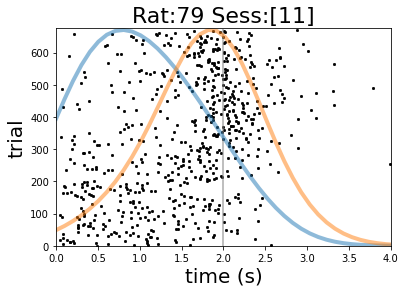

array([[ 0.488, 24.402,  0.   ,  1.   ,  2.   , 11.   ],
       [ 1.602,  3.964,  0.   ,  1.   ,  2.   , 11.   ],
       [ 2.564, 11.154,  1.   ,  1.   ,  2.   , 11.   ],
       ...,
       [ 1.87 ,  1.272,  0.   ,  1.   ,  2.   , 11.   ],
       [ 2.012,  2.552,  1.   ,  1.   ,  2.   , 11.   ],
       [ 2.876,    nan,  1.   ,  1.   ,  2.   , 11.   ]])

In [29]:
D = dr.drrd('AH0',animalID= 79, sessions= [11], dataPath= dataPathAH)
D

In [30]:
data = med2tec(dataPath+'AB1014.001')
data = np.array(data)
data = fix_clock_reset(data)

#making sure data starts with 1 and ends with a 3
nini = np.where(data[:,1]==1)[0][0]   # finds the first lever press
nend = np.where(data[:,1]==3)[0][-1]  # finds the last lever release
data = data[nini:nend+1,:]

dt  = data[ data[:, 1] == 3, 0]     - data[ data[:, 1] == 1, 0]
iti = data[ data[:, 1] == 1, 0][1:] - data[ data[:, 1] == 3, 0][0:-1]

iti = np.append(iti,np.nan)


# --- Indexes for each of the output variable columns
dtCol      = 0  # column zero contains the response duration (dt)
itiCol     = 1  # column one contains the intertrial interval (iti)
primedCol  = 2
validCol   = 3
phaseCol   = 4
sessionCol = 5  # session variable column index
Ncols = 6


# --- look for indexes of temporal events ---
startIndex    = np.array([i for i in range(len(data)) if data[i, 1] ==  1])  # code 1 indicates that the lever was pressed
endIndex      = np.array([i for i in range(len(data)) if data[i, 1] ==  3])  # instant when the lever was released
primeIndex    = np.array([i for i in range(len(data)) if data[i, 1] == 18])  # moment when the trial reached the criterion
lightOnIndex  = np.array([i for i in range(len(data)) if data[i, 1] == 11])  # when light was turned on (beginning of session)
lightOffIndex = np.array([i for i in range(len(data)) if data[i, 1] == 21])  # when light was turned off (end of session)
phaseAdvIndex = np.array([i for i in range(len(data)) if data[i, 1] == 17])  # moment of phase advance (criterion increased)
phaseBckIndex = np.array([i for i in range(len(data)) if data[i, 1] == 27])  # moment of phase retreat (criterion decreased)

# eliminating the last trial in case it was incomplete
startIndex = startIndex[0:len(endIndex)]  
startIndex

print('_' * 80)
print(len(endIndex),' trials found')

# --- checking if there was at least one trial, 
# --- otherwise stops the routine end return empty vector
# if len(startIndex) == 0:
#     print('No trials recorded')
#     return ([])

# --- searching for trials in which the animals received food. We call these "primed" ----
primedTrials = np.array([startIndex[startIndex < i].size - 1 for i in primeIndex])

# --- searching for trials in which animals progressed or retreated phase
phaseAdvTrials = np.array([startIndex[startIndex < i].size - 1 for i in phaseAdvIndex])
phaseBckTrials = np.array([startIndex[startIndex < i].size - 1 for i in phaseBckIndex])



NameError: name 'dataPath' is not defined

In [ ]:
# completing data in case the lightOff event wasn't found
# includes a lightOff event in the last trial
if len(lightOnIndex) != len(lightOffIndex):
    if len(lightOnIndex) == len(lightOffIndex) + 1:
        lightOffIndex = np.append(lightOffIndex, startIndex[-1] + 1)
    else:
        print('Incompatible number of events')
#        return (-2)

In [ ]:
validTrials = np.array([], dtype=np.int64).reshape(0, )   # initiates empty vector to store all valid trials

for i in range(len(lightOnIndex)):
    Nu = np.array(len(startIndex[startIndex < lightOnIndex[i]]))
    print(Nu)
    Nv = np.array(len(startIndex[startIndex < lightOffIndex[i]]))
    validTrials = np.hstack([validTrials, range(Nu, Nv)])

validTrials = np.array(validTrials)  # transforms to numpy array
validTrials

In [ ]:
# --- search for valid trials in which animals were and were not reinforded ---
validPrimed    = np.intersect1d(validTrials, primedTrials)
validNonPrimed = np.setdiff1d  (validTrials, primedTrials)
invalid        = np.setdiff1d  (range(len(startIndex)), validTrials)

# --- Organizing data in one single matriz: D --- 
D = np.zeros((len(startIndex), Ncols))  # Initiates the vector for speed

# --- Calculating the duration of the lever presses ---
D[:  ,  dtCol] = data[endIndex, 0]       - data[startIndex, 0]     # time elapsed from press until relesase
D[:-1, itiCol] = data[startIndex[1:], 0] - data[endIndex[:-1], 0]  # time between release and press ( beginning of next trial)
D[-1 , itiCol] = np.nan                                            # the last trial has no ITI, stores NaN

# --- saving each data in respective column
if len(primedTrials) > 0: 
    D[primedTrials, primedCol] = 1  # sets to 1 all the trials that were primed

if len(validTrials) > 0:
    for k in validTrials: D[int(k), validCol] = 1

if len(phaseAdvTrials) > 0: 
    D[phaseAdvTrials, phaseCol] = 1

if len(phaseBckTrials) > 0: 
    D[phaseBckTrials, phaseCol] = -1

# D[:,phaseCol]               = np.cumsum(D[:,phaseCol])+iniPh
D[:, sessionCol] = session  # adds the session number to data (same for all lines)

# Getting the time where the rats exceeded the criterion time
# these are called primed trials, and occurr at the prime time.
# we can get the primed times by subtracting the data where the prime happened 
# from the event before, which necessarily is the lever press
primeTimes = [0] * D.shape[0]

for primed in primedTrials:
    thisIndex = startIndex[primed]
    primeTimes[primed] = np.round(data[thisIndex + 1, 0] - data[thisIndex, 0], decimals=5)

print(np.unique(primeTimes))
crit = extractCriterion(phAdv=D[:, phaseCol], primed=D[:, primedCol], primeTimes=primeTimes)
D[:, phaseCol] = crit

# --- printing output with the summary of the results ---
print(
    f'Rat{animalID}  Trials:{len(startIndex)}  Reinforced:{len(validPrimed)}  Non-Reinforced:{len(validNonPrimed)}  Invalid:{len(invalid)}\n')

# --- graphical part ---
if plotFlag:
    plotDrrd(D, filename)